In [1]:
import subprocess

#Generate .smt2 file in Dafny

#set the information
shell_used = "powershell" #The shell used
Dafny_path = "~/.vscode/extensions/dafny-lang.ide-vscode-3.2.2/out/resources/4.4.0/github/dafny" #dafny directory path
dfy_fpath = "./Dafny_file.dfy" # .dfy file path
smt2_fname = "Dafny_VC.smt2" # .smt2 file name 
smt2_generation_cmd = "./dafny verify --solver-log " + smt2_fname + " --boogie /normalizeNames:0 " + dfy_fpath
command = [shell_used, "cd " + Dafny_path +";" + smt2_generation_cmd]

# Execute the command 
result = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(result.out)

CompletedProcess(args=['powershell', 'cd ~/.vscode/extensions/dafny-lang.ide-vscode-3.2.2/out/resources/4.4.0/github/dafny;./dafny verify --solver-log Dafny_VC.smt2 --boogie /normalizeNames:0 ./Dafny_file.dfy'], returncode=0, stdout='\nDafny program verifier finished with 1 verified, 0 errors\n', stderr='')


In [22]:
import subprocess
#Generate .smt2 file in Verus

#set the information
shell_used = "powershell" #The shell used
Verus_path = "E:/Verus/verus/source/target-verus/release" #Verus directory path (must go to release!!!!!)
Verus_fpath = "./Verus_file.rs" # .rs file path
smt2_generation_cmd = "./verus --log-smt " + Verus_fpath
command = [shell_used, "cd " + Verus_path +";" + smt2_generation_cmd]

# Execute the command 
result = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(result.stdout)

verification results:: 2 verified, 0 errors



In [ ]:
##################################################################


Dafny program verifier finished with 1 verified, 0 errors

There are 0 push and pop pairs now
total time: 66.9 ms

There are 200 push and pop pairs now
total time: 160.7 ms
One assertion is approximately: 0.08034999999999999 ms

There are 400 push and pop pairs now
total time: 245.0 ms
One assertion is approximately: 0.1225 ms

There are 600 push and pop pairs now
total time: 337.7 ms
One assertion is approximately: 0.16885 ms

There are 800 push and pop pairs now
total time: 418.5 ms
One assertion is approximately: 0.20925 ms

There are 1000 push and pop pairs now
total time: 501.6 ms
One assertion is approximately: 0.2508 ms

There are 1200 push and pop pairs now
total time: 593.6 ms
One assertion is approximately: 0.2968 ms

There are 1400 push and pop pairs now
total time: 684.4 ms
One assertion is approximately: 0.3422 ms

There are 1600 push and pop pairs now
total time: 785.8 ms
One assertion is approximately: 0.39289999999999997 ms

There are 1800 push and pop pairs now
total 

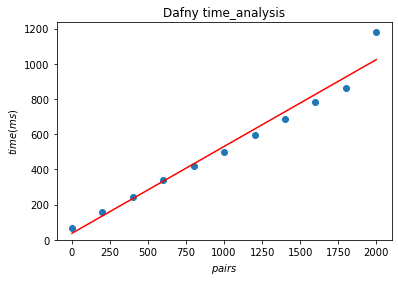

In [11]:
# Mathcing method, Dafny

import subprocess
import os
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

def grab_pairs(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if '(push 1)' in line:
            start_line = i
        elif '(pop 1)' in line:
            end_line = i
            break
    return lines[start_line:end_line+1]

# remove the push and pop pairs from original Testing method
def remove_paris(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if '(push 1)' in line:
            start_line = i
        elif '(pop 1)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        lines = lines[:start_line] + lines[end_line+1:]

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push 1)' in line:
                count += 1
        print("There are", count, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")

# restore the file from 0 push pop pairs
def restore_file(filename, txt):
    test_method = False
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    for i, line in enumerate(lines):
        if "; Valid" in line:
            start_line = i
            break

    if start_line is not None:
        for i in range(len(txt)):
            lines.insert(start_line,txt[i])
            start_line += 1
        
        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
        
    else:
        print("Commands not found in file.")



def duplicate_lines(filename, dup_times):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if '(push 1)' in line:
            start_line = i
        elif '(pop 1)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        # Extract the section to duplicate
        section_to_duplicate = lines[start_line:end_line + 1]
        
        # Duplicate the section several times as asked
        duplicated_section = section_to_duplicate * (dup_times)
        
        start_insert = end_line+1
        for j in range(len(duplicated_section)):
            lines.insert(start_insert,duplicated_section[j])
            start_insert += 1

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push 1)' in line:
                count += 1
        print("There are", count, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")



def grab_time(output):
    flag = False
    for i in range(len(output)):
        if output[i] == '\n':
            flag = True
            continue
        if flag == True and output[i:i+2] == "ms":
            k = i-2
            while output[k] != ' ':
                k -= 1
            return float(output[k+1:i-1])
        elif flag == True and output[i] == 's' :
            k = i-2
            while output[k] != ' ':
                k -= 1
            return float(output[k+1:i-1])*1000
    return -1


def time_analysis(pairNum_list):
    #Generate .smt2 file in Dafny
    #set the information
    shell_used = "powershell" #The shell used
    Dafny_path = "~/.vscode/extensions/dafny-lang.ide-vscode-3.2.2/out/resources/4.4.0/github/dafny" #dafny directory path
    dfy_fpath = "./Dafny_file.dfy" # .dfy file path
    smt2_fname = "Dafny_VC.smt2" # .smt2 file name 
    smt2_generation_cmd = "./dafny verify --solver-log " + smt2_fname + " --boogie /normalizeNames:0 " + dfy_fpath
    command = [shell_used, "cd " + Dafny_path +";" + smt2_generation_cmd]
    
    # Execute the command 
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Print the output
    print(result.stdout)
    
    #initialization
    smt2_path = os.path.expanduser(Dafny_path + '/' + smt2_fname) 
    command = [shell_used, "cd " + Dafny_path +";" + "hyperfine \'.\\z3\\bin\\z3-4.12.1.exe " + smt2_fname + "\'"]
    times = []
    previous = 1
    pairs = grab_pairs(smt2_path)
    
    #calculate times
    #start from 0 push-pop pairs
    remove_paris(smt2_path)
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    pairNum_list.insert(0,0)
    times.append(grab_time(result.stdout))
    print("total time:", times[-1], "ms")
    print()
    
    restore_file(smt2_path, pairs)
    for i in pairNum_list[1:]:
        duplicate_lines(smt2_path, i-previous)
        result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
        previous = i
        times.append(grab_time(result.stdout))
        print("total time:", times[-1], "ms")
        print("One assertion is approximately:", times[-1]/pairNum_list[-1], "ms\n")

    #draw the picture for time depends on pair_number
    plt.figure()
    plt.scatter(pairNum_list, times)
    plt.xlabel('$pairs$')
    plt.ylabel('$time(ms)$')
    plt.title('Dafny time_analysis')
    plt.ylim(bottom=0)
 
    # Add the regression line to the plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(pairNum_list, times)
    regression_line = [slope * x + intercept for x in pairNum_list]
    plt.plot(pairNum_list, regression_line, color='red')
    
    plt.show()

pairNum_list = [200,400,600,800,1000,1200,1400,1600,1800,2000]
time_analysis(pairNum_list)



verification results:: 2 verified, 0 errors

There are 0 push and pop pairs now
total time: 53.9 ms

There are 200 push and pop pairs now
total time: 117.7 ms
One assertion is approximately: 0.05885 ms

There are 400 push and pop pairs now
total time: 176.7 ms
One assertion is approximately: 0.08835 ms

There are 600 push and pop pairs now
total time: 240.4 ms
One assertion is approximately: 0.1202 ms

There are 800 push and pop pairs now
total time: 292.5 ms
One assertion is approximately: 0.14625 ms

There are 1000 push and pop pairs now
total time: 364.2 ms
One assertion is approximately: 0.18209999999999998 ms

There are 1200 push and pop pairs now
total time: 431.1 ms
One assertion is approximately: 0.21555000000000002 ms

There are 1400 push and pop pairs now
total time: 494.5 ms
One assertion is approximately: 0.24725 ms

There are 1600 push and pop pairs now
total time: 547.8 ms
One assertion is approximately: 0.2739 ms

There are 1800 push and pop pairs now
total time: 612.0 m

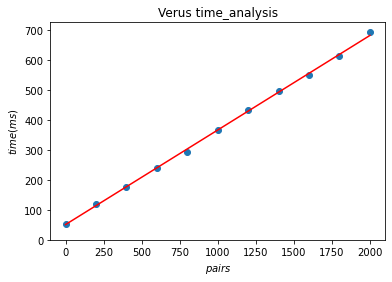

In [21]:
# Mathcing method, Verus

import subprocess
import os
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

def grab_pairs(filename):
    test_method = False
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if ";; Function-Def Verus_file::Testing" in line:
            test_method = True
        if test_method == False:
            continue
        if '(push)' in line:
            start_line = i
        elif '(pop)' in line:
            end_line = i
            break
    return lines[start_line:end_line+1]

# remove the push and pop pairs from original Testing method
def remove_paris(filename):
    test_method = False
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if ";; Function-Def Verus_file::Testing" in line:
            test_method = True
        if test_method == False:
            continue
        if '(push)' in line:
            start_line = i
        elif '(pop)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        lines = lines[:start_line] + lines[end_line+1:]

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push)' in line:
                count += 1
        print("There are", count-1, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")
        
# restore the file from 0 push pop pairs
def restore_file(filename, txt):
    test_method = False
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    for i, line in enumerate(lines):
        if ";; Function-Def Verus_file::Testing" in line:
            start_line = i+2
            break

    if start_line is not None:
        for i in range(len(txt)):
            lines.insert(start_line,txt[i])
            start_line += 1
        lines.insert(start_line, '\n')
        
        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
        
    else:
        print("Commands not found in file.")
    
    

def duplicate_lines(filename, dup_times):
    test_method = False
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if ";; Function-Def Verus_file::Testing" in line:
            test_method = True
        if test_method == False:
            continue
        if '(push)' in line:
            start_line = i
        elif '(pop)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        # Extract the section to duplicate
        section_to_duplicate = lines[start_line:end_line + 1]
        
        # Duplicate the section several times as asked
        duplicated_section = section_to_duplicate * (dup_times)
        
        start_insert = end_line+1
        for j in range(len(duplicated_section)):
            lines.insert(start_insert,duplicated_section[j])
            start_insert += 1

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push)' in line:
                count += 1
        print("There are", count-1, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")

def grab_time(output):
    flag = False
    for i in range(len(output)):
        if output[i] == '\n':
            flag = True
            continue
        if flag == True and output[i:i+2] == "ms":
            k = i-2
            while output[k] != ' ':
                k -= 1
            return float(output[k+1:i-1])
        elif flag == True and output[i] == 's' :
            k = i-2
            while output[k] != ' ':
                k -= 1
            return float(output[k+1:i-1])*1000
    return -1

def time_analysis(pairNum_list):
    #set the information
    shell_used = "powershell" #The shell used
    Verus_path = "E:/Verus/verus/source/target-verus/release" #Verus directory path (must go to release!!!!!)
    Verus_fpath = "./Verus_file.rs" # .rs file path
    smt2_generation_cmd = "./verus --log-smt " + Verus_fpath
    command = [shell_used, "cd " + Verus_path +";" + smt2_generation_cmd]
    
    # Execute the command 
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Print the output
    print(result.stdout)
    
    #initialization
    smt2_path = os.path.expanduser(Verus_path + '/.verus-log/root.smt2') 
    command = [shell_used, "cd " + Verus_path +";" + "hyperfine \'.\\z3.exe ./.verus-log/root.smt2\' "]
    times = []
    previous = 1
    pairs = grab_pairs(smt2_path)
    
    #calculate times
    #start from 0 push-pop pairs
    remove_paris(smt2_path)
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    pairNum_list.insert(0,0)
    times.append(grab_time(result.stdout))
    print("total time:", times[-1], "ms")
    print()
    
    restore_file(smt2_path, pairs)
    for i in pairNum_list[1:]:
        duplicate_lines(smt2_path, i-previous)
        result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
        previous = i
        times.append(grab_time(result.stdout))
        print("total time:", times[-1], "ms")
        print("One assertion is approximately:", times[-1]/pairNum_list[-1], "ms\n")
        
    #draw the picture for time depends on pair_number
    plt.figure()
    plt.scatter(pairNum_list, times)
    plt.xlabel('$pairs$')
    plt.ylabel('$time(ms)$')
    plt.title('Verus time_analysis')
    plt.ylim(bottom=0)
 
    # Add the regression line to the plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(pairNum_list, times)
    regression_line = [slope * x + intercept for x in pairNum_list]
    plt.plot(pairNum_list, regression_line, color='red')
    
    plt.show()

pairNum_list = [200,400,600,800,1000,1200,1400,1600,1800,2000]
time_analysis(pairNum_list)

In [3]:
a =[1,2,3]
a.insert(1, 6)
print(a)

[1, 6, 2, 3]
